In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import time

In [25]:
df = pd.read_csv('Synthetic_Financial_datasets_log.csv')
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [26]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


C:\Users\kruti\AppData\Local\Temp\ipykernel_5704\2745428076.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=fig)


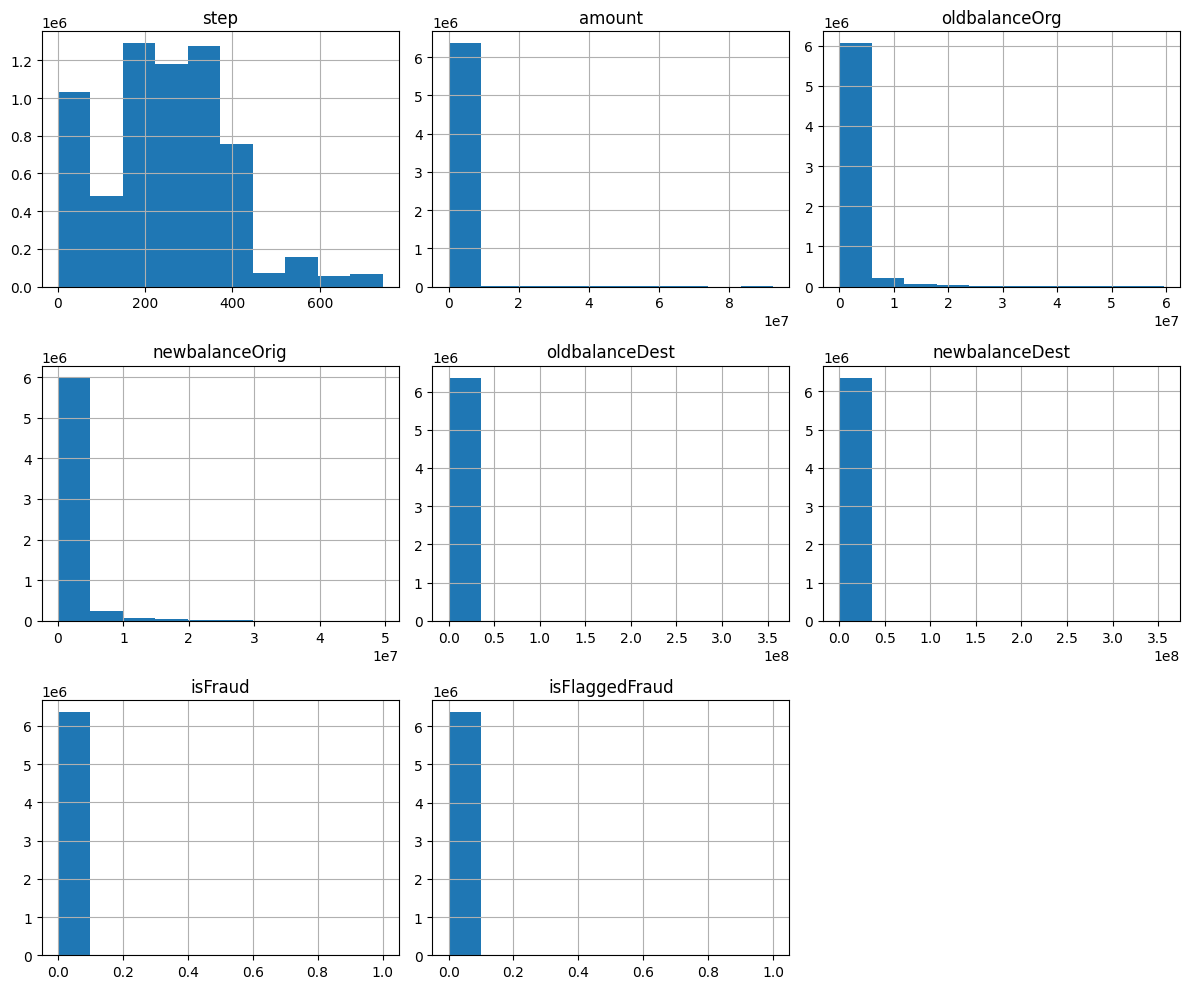

In [28]:
fig = plt.figure(figsize=(12,10))
df.hist(ax=fig)
plt.tight_layout()

In [29]:
print(sum(df.isna().sum()))

0


isFraud
0    6354407
1       8213
Name: count, dtype: int64


<Axes: >

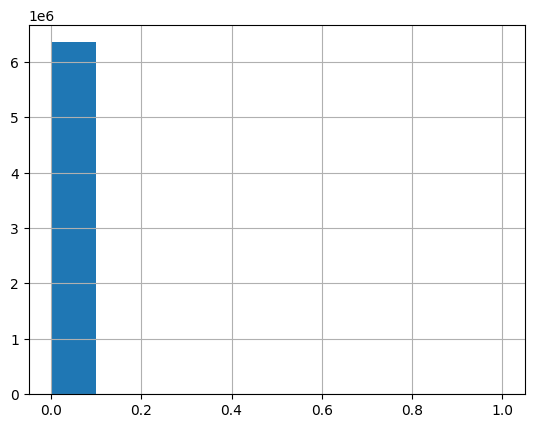

In [32]:
print(df['isFraud'].value_counts())
df['isFraud'].hist()

In [41]:
random_state = 123
features = [col for col in df.columns if col not in ['id', 'isFraud']]
X_train, X_test, y_train, y_test = train_test_split(df[features], df['isFraud'], test_size=0.3, random_state=random_state, stratify=df['isFraud'], shuffle=True)
# features

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'PAYMENT'

In [10]:
def show_model_results(model):
    pred = model.predict(X_test)
    pred = np.where(pred > 0.5, 1, 0)
    print(classification_report(y_test, pred))
    cm = confusion_matrix(y_test, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

def plot_history(history):
    training_loss = history.history['loss']
    validation_loss = history.history['val_loss']
    plt.plot(training_loss, label='Training Loss')
    plt.plot(validation_loss, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [11]:
callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` 
        # is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined 
        # as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further 
        # defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]

In [12]:
print(y_train[:5])

325383    1
477277    1
70496     0
361975    1
362843    1
Name: Class, dtype: int64


In [13]:
def create_simple_nnmodel(neurons):
    model = Sequential()
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model 

Epoch 1/10
622/622 [==============================] - 3s 4ms/step - loss: 0.1872 - accuracy: 0.9264 - val_loss: 0.1011 - val_accuracy: 0.9607
Epoch 2/10
622/622 [==============================] - 2s 3ms/step - loss: 0.0852 - accuracy: 0.9672 - val_loss: 0.0749 - val_accuracy: 0.9708
Epoch 3/10
622/622 [==============================] - 2s 3ms/step - loss: 0.0637 - accuracy: 0.9760 - val_loss: 0.0569 - val_accuracy: 0.9797
Epoch 4/10
622/622 [==============================] - 2s 3ms/step - loss: 0.0490 - accuracy: 0.9821 - val_loss: 0.0441 - val_accuracy: 0.9837
Epoch 5/10
622/622 [==============================] - 2s 3ms/step - loss: 0.0390 - accuracy: 0.9861 - val_loss: 0.0359 - val_accuracy: 0.9870
Epoch 6/10
622/622 [==============================] - 2s 3ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.0296 - val_accuracy: 0.9903
Epoch 7/10
622/622 [==============================] - 2s 3ms/step - loss: 0.0262 - accuracy: 0.9921 - val_loss: 0.0244 - val_accuracy: 0.9933
Epoch 

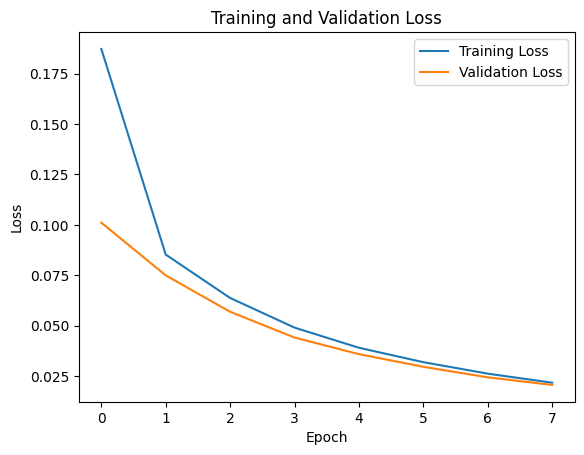

In [14]:
start_time = time.time()
nn_model = create_simple_nnmodel(len(features))
history = nn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

In [15]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 29)                870       
                                                                 
 dense_1 (Dense)             (None, 1)                 30        
                                                                 
Total params: 900
Trainable params: 900
Non-trainable params: 0
_________________________________________________________________


5331/5331 [==============================] - 8s 1ms/step
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.99      1.00      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



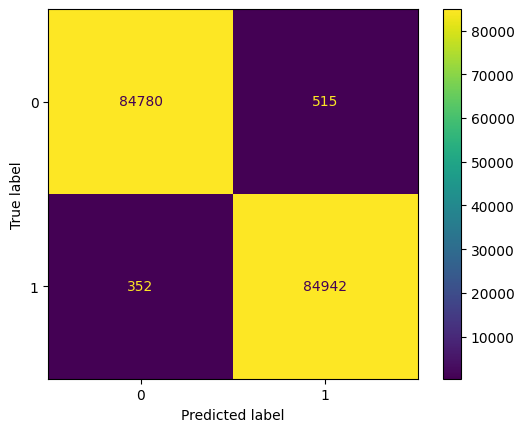

In [16]:
show_model_results(nn_model)

Epoch 1/20
622/622 [==============================] - 5s 6ms/step - loss: 0.1619 - accuracy: 0.9438 - val_loss: 0.0993 - val_accuracy: 0.9624
Epoch 2/20
622/622 [==============================] - 3s 5ms/step - loss: 0.0841 - accuracy: 0.9672 - val_loss: 0.0751 - val_accuracy: 0.9718
Epoch 3/20
622/622 [==============================] - 4s 6ms/step - loss: 0.0673 - accuracy: 0.9743 - val_loss: 0.0630 - val_accuracy: 0.9751
Epoch 4/20
622/622 [==============================] - 4s 6ms/step - loss: 0.0579 - accuracy: 0.9780 - val_loss: 0.0557 - val_accuracy: 0.9799
Epoch 5/20
622/622 [==============================] - 3s 5ms/step - loss: 0.0514 - accuracy: 0.9806 - val_loss: 0.0495 - val_accuracy: 0.9817
Epoch 6/20
622/622 [==============================] - 3s 5ms/step - loss: 0.0463 - accuracy: 0.9828 - val_loss: 0.0453 - val_accuracy: 0.9835
Epoch 7/20
622/622 [==============================] - 3s 5ms/step - loss: 0.0424 - accuracy: 0.9847 - val_loss: 0.0424 - val_accuracy: 0.9852
Epoch 

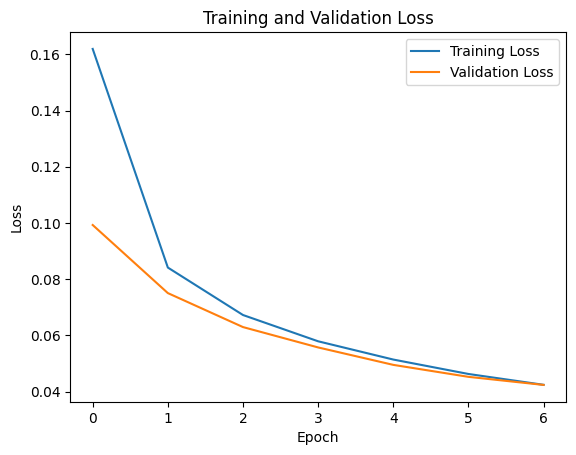

In [17]:
def create_cnnmodel(input_length):
    # Define model architecture
    model = keras.Sequential([
        Conv1D(filters=5, kernel_size=10, activation="relu", input_shape=(input_length, 1), strides=2),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(32, activation="relu"),
        Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

start_time = time.time()
cnn_model = create_cnnmodel(len(features))
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

5331/5331 [==============================] - 10s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     85295
           1       0.99      0.99      0.99     85294

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589



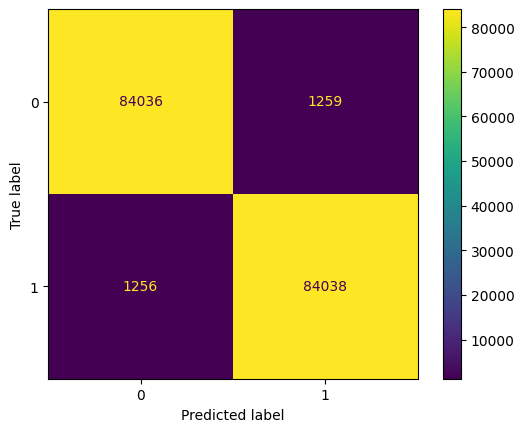

In [18]:
show_model_results(cnn_model)

In [19]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 5)             55        
                                                                 
 max_pooling1d (MaxPooling1D  (None, 5, 5)             0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 25)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                832       
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 920
Trainable params: 920
Non-trainable params: 0
________________________________________________________

In [20]:
def create_deep_nnmodel(neurons):
    model = Sequential()
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model 

Epoch 1/10
622/622 [==============================] - 6s 7ms/step - loss: 0.1094 - accuracy: 0.9603 - val_loss: 0.0368 - val_accuracy: 0.9877
Epoch 2/10
622/622 [==============================] - 4s 7ms/step - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0158 - val_accuracy: 0.9955
Epoch 3/10
622/622 [==============================] - 4s 6ms/step - loss: 0.0150 - accuracy: 0.9957 - val_loss: 0.0091 - val_accuracy: 0.9978
Epoch 4/10
622/622 [==============================] - 4s 6ms/step - loss: 0.0102 - accuracy: 0.9973 - val_loss: 0.0076 - val_accuracy: 0.9981
Epoch 4: early stopping
training time: 18.06 seconds


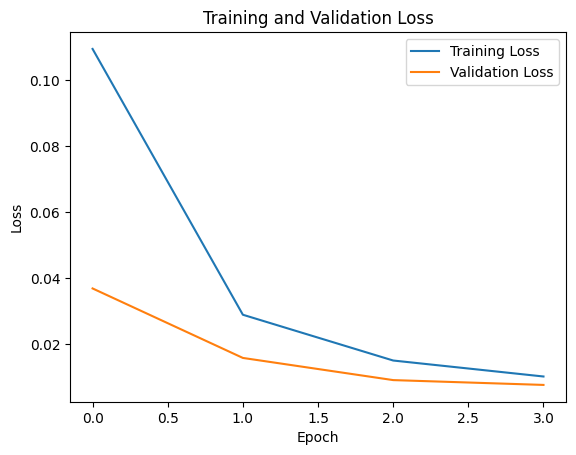

In [21]:
start_time = time.time()
deep_nn_model = create_deep_nnmodel(len(features))
history = deep_nn_model.fit(X_train, y_train, epochs=10, batch_size=512, verbose=1, validation_split=0.2, callbacks=callbacks)
print(f'training time: {round(time.time()-start_time, 2)} seconds')
plot_history(history)

5331/5331 [==============================] - 8s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       1.00      1.00      1.00     85294

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



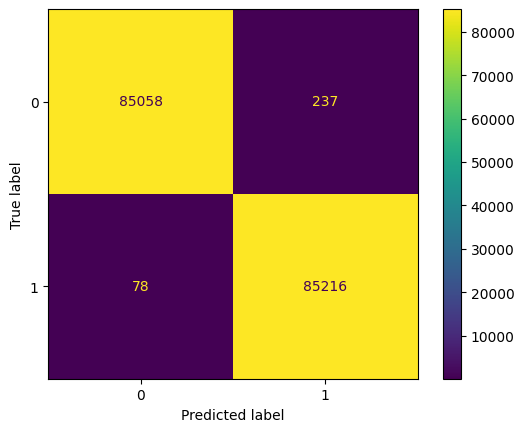

In [22]:
show_model_results(deep_nn_model)

In [23]:
deep_nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 29)                870       
                                                                 
 dense_5 (Dense)             (None, 64)                1920      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)               